## PREDICTING HEART DISEASE USING MACHINE LEARNING - AI IN HEALTHCARE

This project assumes you have been asked by a hospital to use machine learning to predict heart disease. Your job is to develop a model and highlight two to three important features that doctors and nurses can focus on to improve patient health. You decide to use a decision tree classifier with fine-tuned hyperparameters. After the model has been built, you will interpret results using feature_importances_, an attribute that determines the most important features in predicting heart disease.

In [62]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import QuantileTransformer

import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
# load heart disease data
df_heart = pd.read_csv('heart_disease.csv')

In [64]:
# load first five rows of the data
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


The target column, conveniently labeled 'target' is binary, with 1 indicating that the patient has heart disease and 0 indicating that they do not.Here are the meanings of the predictor columns, taken from the data source linked previously:Split the data into training and test sets in preparation for machine learning:

age -> Age in years

sex -> Sex (1 = male; 0 = female)

cp -> Chest pain type (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic)

trestbps -> Resting blood pressure (in mm Hg on admission to the hospital)

chol -> Serum cholesterol in mg/dl 6 fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

fbs -> Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

restecg -> Resting electrocardiographic results (0 = normal, 1 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

thalach -> Maximum heart rate achieved

exang -> Exercise induced angina (1 = yes; 0 = no)

oldpeak -> ST depression induced by exercise relative to rest

slope -> The slope of the peak exercise ST segment (1 = upsloping, 2 = flat, 3 = downsloping)

ca -> Number of major vessels (0-3) colored by fluoroscopy

thal -> 3 = normal; 6 = fixed defect; 7 = reversible defect

In [65]:
# check for any missing values in the data
df_heart.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [66]:
# describe data
df_heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [67]:
# check data info
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


we can see that the data is already clean for modeling

<AxesSubplot:>

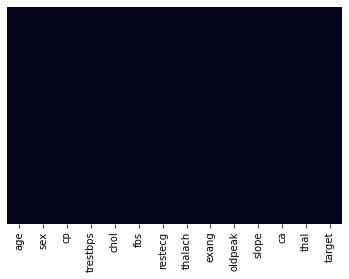

In [68]:
# Checking missing values for training data

sns.heatmap(df_heart.isnull(), yticklabels=False, cbar=False)

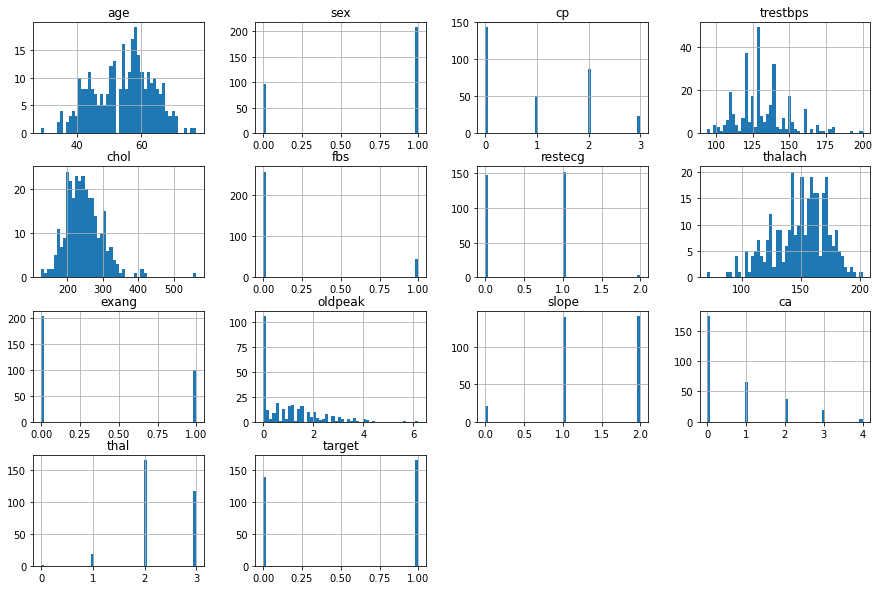

In [69]:
# visualize to check if data is normal
df_heart.hist(bins=50, figsize=(15, 10))
plt.show()

We can see that the output is now normalized

In [76]:
# split data into X and y values
X = df_heart.iloc[:, :-1]
y = df_heart.iloc[:, -1]

In [77]:
# split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

### Decision Tree classifier

In [79]:
# Before implementing hyperparameters, it's helpful to have a baseline model for comparison. 
# Use cross_val_score with a DecisionTreeClassifier as follows:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

model = DecisionTreeClassifier(random_state=2)
scores = cross_val_score(model, X, y, cv=5)
print('Accuracy:', np.round(scores, 2))
print('Accuracy mean: %0.2f' % (scores.mean()))

Accuracy: [0.74 0.85 0.77 0.73 0.7 ]
Accuracy mean: 0.76


The initial accuracy is 76%. Let's see what gains can be made with hyperparameter fine-tuning.

### RandomizedSearch CLF function
When fine-tuning many hyperparameters, GridSearchCV can take too much time. The scikit-learn library provides RandomizedSearchCV as a wonderful alternative. RandomizedSearchCV works in the same way as GridSearchCV, but instead of trying all hyperparameters, it tries a random number of combinations. It's not meant to be exhaustive. It's meant to find the best combinations in limited time. Here's a function that uses RandomizedSearchCV to return the best model along with the scores. The inputs are params (a dictionary of hyperparameters to test), runs (number of hyperparameter combinations to check), and DecisionTreeClassifier:

In [80]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

def randomized_search_clf(params, runs=20, clf=DecisionTreeClassifier(random_state=2)):
    ran_clf = RandomizedSearchCV(clf, params, n_iter=runs, cv=5, n_jobs=-1, random_state=2)
    ran_clf.fit(X_train, y_train)
    best_model = ran_clf.best_estimator_
    best_score = ran_clf.best_score_
    print("Training score: {:.3f}".format(best_score))
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print('Test score: {:.3f}'.format(accuracy))
    return best_model

#### Choosing hyperparameters
There is no single correct approach for choosing hyperparameters. Experimentation is the name of the game. Here is an initial list, placed inside the randomized_search_clf function. These numbers have been chosen with the aim of reducing variance and
trying an expansive range:

In [81]:
randomized_search_clf(params={'criterion':['entropy', 'gini'],
                              'splitter':['random','best'], 
                              'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01],
                              'min_samples_split':[2, 3, 4, 5, 6, 8, 10],
                              'min_samples_leaf':[1, 0.01, 0.02, 0.03, 0.04],
                              'min_impurity_decrease':[0.0, 0.0005, 0.005, 0.05, 0.10, 0.15, 0.2],
                              'max_leaf_nodes':[10, 15, 20, 25, 30, 35, 40, 45, 50, None],
                              'max_features':['auto', 0.95, 0.90, 0.85, 0.80, 0.75, 0.70],
                              'max_depth':[None,2,4,6,8],
                              'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01, 0.05]})

Training score: 0.798
Test score: 0.855


DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features=0.8,
                       max_leaf_nodes=45, min_samples_leaf=0.04,
                       min_samples_split=10, min_weight_fraction_leaf=0.05,
                       random_state=2)

This is a definite improvement, and the model generalizes well on the test set. Let's see if we can do better by narrowing the range.

#### Narrowing the range
Narrowing the range is one strategy to improve hyperparameters. As an example, using a baseline of max_depth=8 chosen from the best model, we may narrow the range to from 7 to 9. Another strategy is to stop checking hyperparameters whose defaults are working fine. entropy, for instance, is not recommended over 'gini' as the differences are very slight. min_impurity_split and min_impurity_decrease may also be left at their defaults.
Here is a new hyperparameter range with an increase of 100 runs:

In [82]:
randomized_search_clf(params={'max_depth':[None, 6, 7],
                              'max_features':['auto', 0.78],
                              'max_leaf_nodes':[45, None], 
                              'min_samples_leaf':[1, 0.035, 0.04, 0.045, 0.05],
                              'min_samples_split':[2, 9, 10],
                              'min_weight_fraction_leaf': [0.0, 0.05, 0.06, 0.07],}, runs=100)

Training score: 0.802
Test score: 0.868


DecisionTreeClassifier(max_depth=7, max_features=0.78, max_leaf_nodes=45,
                       min_samples_leaf=0.045, min_samples_split=9,
                       min_weight_fraction_leaf=0.06, random_state=2)

This model is more accurate in the training and test score. For a proper baseline of comparison, however, it's essential to put the new model into cross_val_clf. This may be achieved by copying and pasting the preceding model:

In [83]:
model = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                               max_features=0.78, max_leaf_nodes=45, min_impurity_decrease=0.0,
                               min_samples_leaf=0.045, min_samples_split=9,min_weight_fraction_leaf=0.06,
                               random_state=2, splitter='best')

In [84]:
scores = cross_val_score(model, X, y, cv=5)
print('Accuracy:', np.round(scores, 2))
print('Accuracy mean: %0.2f' % (scores.mean()))

Accuracy: [0.82 0.9  0.8  0.8  0.78]
Accuracy mean: 0.82


This is six percentage points higher than the default model. When it comes to predicting heart disease, more accuracy can save
lives.

#### feature_importances_
The final piece of the puzzle is to communicate the most important features of the machine learning model. Decision trees come
with a nice attribute, feature_importances_, that does exactly this. First, we need to finalize the best model. Our function returned the best model, but it has not been saved. When testing, it's important not to mix and match training and test sets. After a final model has been selected, however, fitting the model on the entire dataset can be beneficial. Why? Because the goal is to test the model on data that has never been seen and fitting the model on the entire dataset may lead to additional gains in accuracy. Let's define the model using the best hyperparameters and fit it on the entire dataset:

In [85]:
best_clf = DecisionTreeClassifier(class_weight=None, criterion='gini',max_depth=9,max_features=0.8, 
                                  max_leaf_nodes=47,min_impurity_decrease=0.0, min_samples_leaf=1, 
                                  min_samples_split=8,min_weight_fraction_leaf=0.05, random_state=2, 
                                  splitter='best')

In [86]:
best_clf.fit(X, y)

DecisionTreeClassifier(max_depth=9, max_features=0.8, max_leaf_nodes=47,
                       min_samples_split=8, min_weight_fraction_leaf=0.05,
                       random_state=2)

In order to determine the most important features, we can run the feature_importances_ attribute on best_clf:


In [87]:
best_clf.feature_importances_

array([0.04830121, 0.04008887, 0.47546568, 0.        , 0.        ,
       0.        , 0.        , 0.00976578, 0.        , 0.02445397,
       0.02316427, 0.1774694 , 0.20129082])

It's not easy to interpret these results. The following code zips the columns along with the most important features into a dictionary before displaying them in reverse order for a clean output that is easy to interpret:

In [88]:
feature_dict = dict(zip(X.columns, best_clf.feature_importances_))
feature_dict

{'age': 0.048301210720103474,
 'sex': 0.04008887174150333,
 'cp': 0.47546567857183675,
 'trestbps': 0.0,
 'chol': 0.0,
 'fbs': 0.0,
 'restecg': 0.0,
 'thalach': 0.009765775335507229,
 'exang': 0.0,
 'oldpeak': 0.02445396706887979,
 'slope': 0.023164268462395016,
 'ca': 0.1774694042213901,
 'thal': 0.20129082387838435}

In [89]:
# Zip columns and feature_importances_ into dict
feature_dict = dict(zip(X.columns, best_clf.feature_importances_))

# Import operator
import operator

# Sort dict by values (as list of tuples)
sorted(feature_dict.items(), key=operator.itemgetter(1), reverse=True)[0:3]

[('cp', 0.47546567857183675),
 ('thal', 0.20129082387838435),
 ('ca', 0.1774694042213901)]

The three most important features are as follows:

**'cp': Chest pain type (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic)**

**'thalach': Maximum heart rate achieved**

**'ca': Number of major vessels (0-3) colored by fluoroscopy**

These numbers may be interpreted as their explanation of variance, so 'cp' accounts for 48% of the variance, which is more than
'thal' and 'ca' combined. You can tell the doctors and nurses that your model predicts if the patient has a heart disease with 82% accuracy using chest pain, maximum heart rate, and fluoroscopy as the three most important characteristics.

In [90]:
# Lets build a model using the three(3) most important features
X = df_heart[['cp', 'thalach', 'ca']]
y = df_heart['target']

In [93]:
# split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [94]:
randomized_search_clf(params={'criterion':['entropy', 'gini'],
                              'splitter':['random','best'], 
                              'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01],
                              'min_samples_split':[2, 3, 4, 5, 6, 8, 10],
                              'min_samples_leaf':[1, 0.01, 0.02, 0.03, 0.04],
                              'min_impurity_decrease':[0.0, 0.0005, 0.005, 0.05, 0.10, 0.15, 0.2],
                              'max_leaf_nodes':[10, 15, 20, 25, 30, 35, 40, 45, 50, None],
                              'max_features':['auto', 0.95, 0.90, 0.85, 0.80, 0.75, 0.70],
                              'max_depth':[None,2,4,6,8],
                              'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01, 0.05]})

Training score: 0.784
Test score: 0.829


DecisionTreeClassifier(max_depth=4, max_features='auto', max_leaf_nodes=30,
                       min_impurity_decrease=0.0005, min_samples_split=10,
                       min_weight_fraction_leaf=0.05, random_state=2)

In [105]:
model_f = DecisionTreeClassifier(max_depth=4, max_features='auto', max_leaf_nodes=30,
                       min_impurity_decrease=0.0005, min_samples_split=10,
                       min_weight_fraction_leaf=0.05, random_state=2)

In [106]:
scores = cross_val_score(model_f, X, y, cv=5)
print('Accuracy:', np.round(scores, 2))
print('Accuracy mean: %0.2f' % (scores.mean()))

Accuracy: [0.82 0.84 0.75 0.82 0.73]
Accuracy mean: 0.79


In [107]:
model_f.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, max_features='auto', max_leaf_nodes=30,
                       min_impurity_decrease=0.0005, min_samples_split=10,
                       min_weight_fraction_leaf=0.05, random_state=2)

In [108]:
y_pred = model_f.predict(X_test)

In [109]:
score = accuracy_score(y_pred, y_test)
print(score)

0.8289473684210527


In [ ]:
# import joblib
# joblib.dump(model_name, 'path/model_name.pkl')